In [1]:
#Importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.cross_validation import train_test_split
%matplotlib inline


In [2]:
#Reading data from Adrvertising dataset
data = pd.read_csv('Advertising.csv')

In [3]:
#Reading first 5 rows from data
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Reading last 5 rows from dataframe
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Assigning features to X and response to series y
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [8]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test =train_test_split(X, y ,random_state =1)

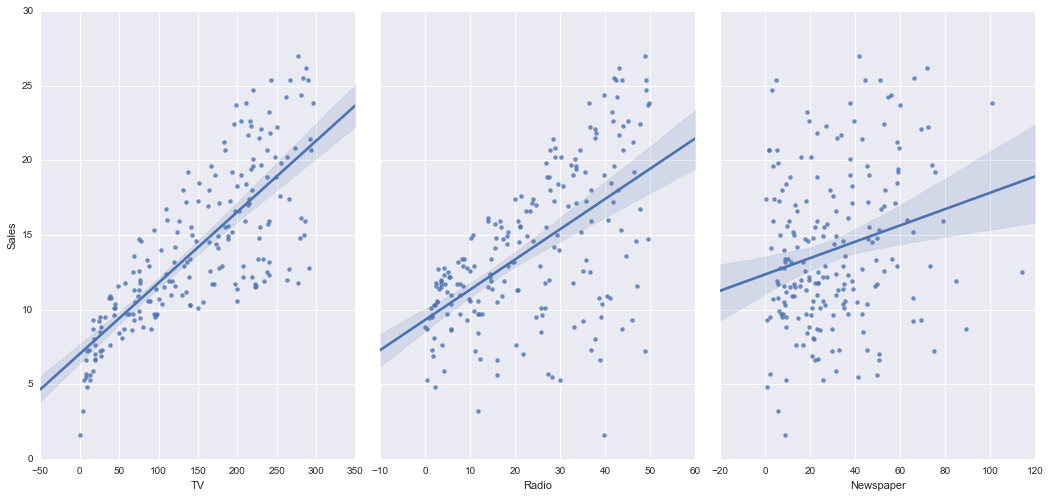

In [9]:
#Creating graph between features and Sales to check the relation using seaborn
sn.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars= 'Sales', size = 7, aspect =0.7,kind='reg')

In [10]:
#Instantiating the Linear Regression model and Fitting the training data to Linear Regression model instance
linereg = LinearRegression()
linereg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#Creating List for Feature Columns and Array and finding the coefficient 
print(linereg.intercept_)
print(linereg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [12]:
#Creating list to zip the coefficient and feature columns together
feature_cols =['TV' , 'Radio', 'Newspaper']
list(zip(feature_cols, linereg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [13]:
#Predicting the model
y_predict = linereg.predict(X_test)
print(y_predict)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


In [14]:
#Importing metrics to calculate the accuracy 
from sklearn import metrics

In [15]:
#Calculating accuracy using mean abosulte error
print(metrics.mean_absolute_error(y_test, y_predict))

1.06689170826


In [16]:
#Calculating accuracy using ,mean squared error
print(metrics.mean_squared_error(y_test,y_predict))

1.97304562023


In [17]:
#Calculating Root mean squared error
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

1.40465142303


In [18]:
#Rerunning model by removing newspaper feature to test the accuracy
feature_cols =['TV','Radio']
X = data[feature_cols]
Y=data['Sales']

In [19]:
X_train, X_test ,y_train , y_test = train_test_split(X, y, random_state=1)

In [20]:
linereg = LinearRegression()

In [21]:
linereg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_predict = linereg.predict(X_test)

In [23]:
print(metrics.mean_absolute_error(y_test, y_predict))
print(metrics.mean_squared_error(y_test, y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

1.04775904112
1.92627604187
1.38790346994
